Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found:  {'ridge__alpha': 10.0}
R^2 Score: -0.000451789441609618
Mean Squared Error: 26343.843995857518
Predicted credit score: 583.8935854616213


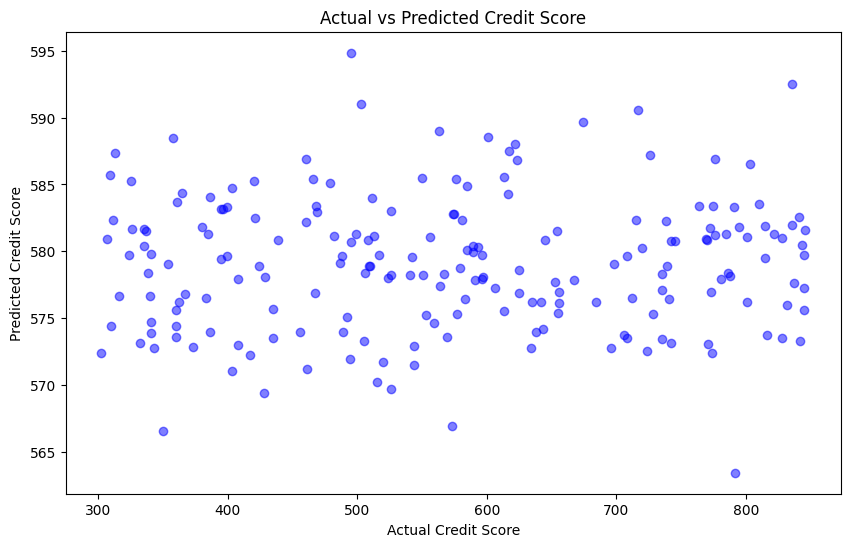

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error


# Generate fake data for credit score prediction (increased to 1000 lines)
np.random.seed(0)
fake_data = {
    'income': np.random.normal(50000, 15000, 1000),
    'age': np.random.randint(20, 70, 1000),
    'credit_history': np.random.randint(1, 10, 1000),
    'credit_score': np.random.randint(300, 850, 1000)
}

# Convert to DataFrame
fake_df = pd.DataFrame(fake_data)

# Split the data into features and labels
X = fake_df[['income', 'age', 'credit_history']]
y = fake_df['credit_score']

# Create a preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['income', 'age', 'credit_history'])
    ],
    remainder='passthrough'
)

# Create a pipeline for regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Hyperparameter tuning
parameters = {
    'ridge__alpha': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Predict the credit scores for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Best parameters found: ", grid_search.best_params_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Function to predict credit score based on income, age, and credit history
def predict_credit_score(income, age, credit_history, model):
    input_data = pd.DataFrame([[income, age, credit_history]], columns=['income', 'age', 'credit_history'])
    return model.predict(input_data)[0]

# Test the function
income = 60000
age = 35
credit_history = 5
predicted_score = predict_credit_score(income, age, credit_history, grid_search)
print(f"Predicted credit score: {predicted_score}")

# Example of visualizing predictions vs actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Score')
plt.show()